# Regression Predict Student Solution

© Explore Data Science Academy


### Predict Overview: Spain Electricity Shortfall Challenge

 INTRODUCTION
 
 Spain is the sixth-largest energy consumer in Europe, with approximately 47.1 million people. More over each citizen relies on energy for their activities thus, the country witnessed the increase in consumption of energy which significantlly called for increased power generation over the years. inculding energy generated by means of fossil fuels and various renewable. 

 The purpose of this notebook is to help us to develop the model that the government of Spain will use to predict the daily shortfall between the energy generated by means of fossil fuel and various renewable sources for the country of spain. The developement of the model will also help the government of spain in his consideration of an expansion of renewable energy resource infrastructure investments. 

 
 The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df =pd.read_csv('utils/data/df_train.csv',index_col=0)
df_test =pd.read_csv('utils/data//df_test.csv',index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


ValueError: num must be 1 <= num <= 44, not 45

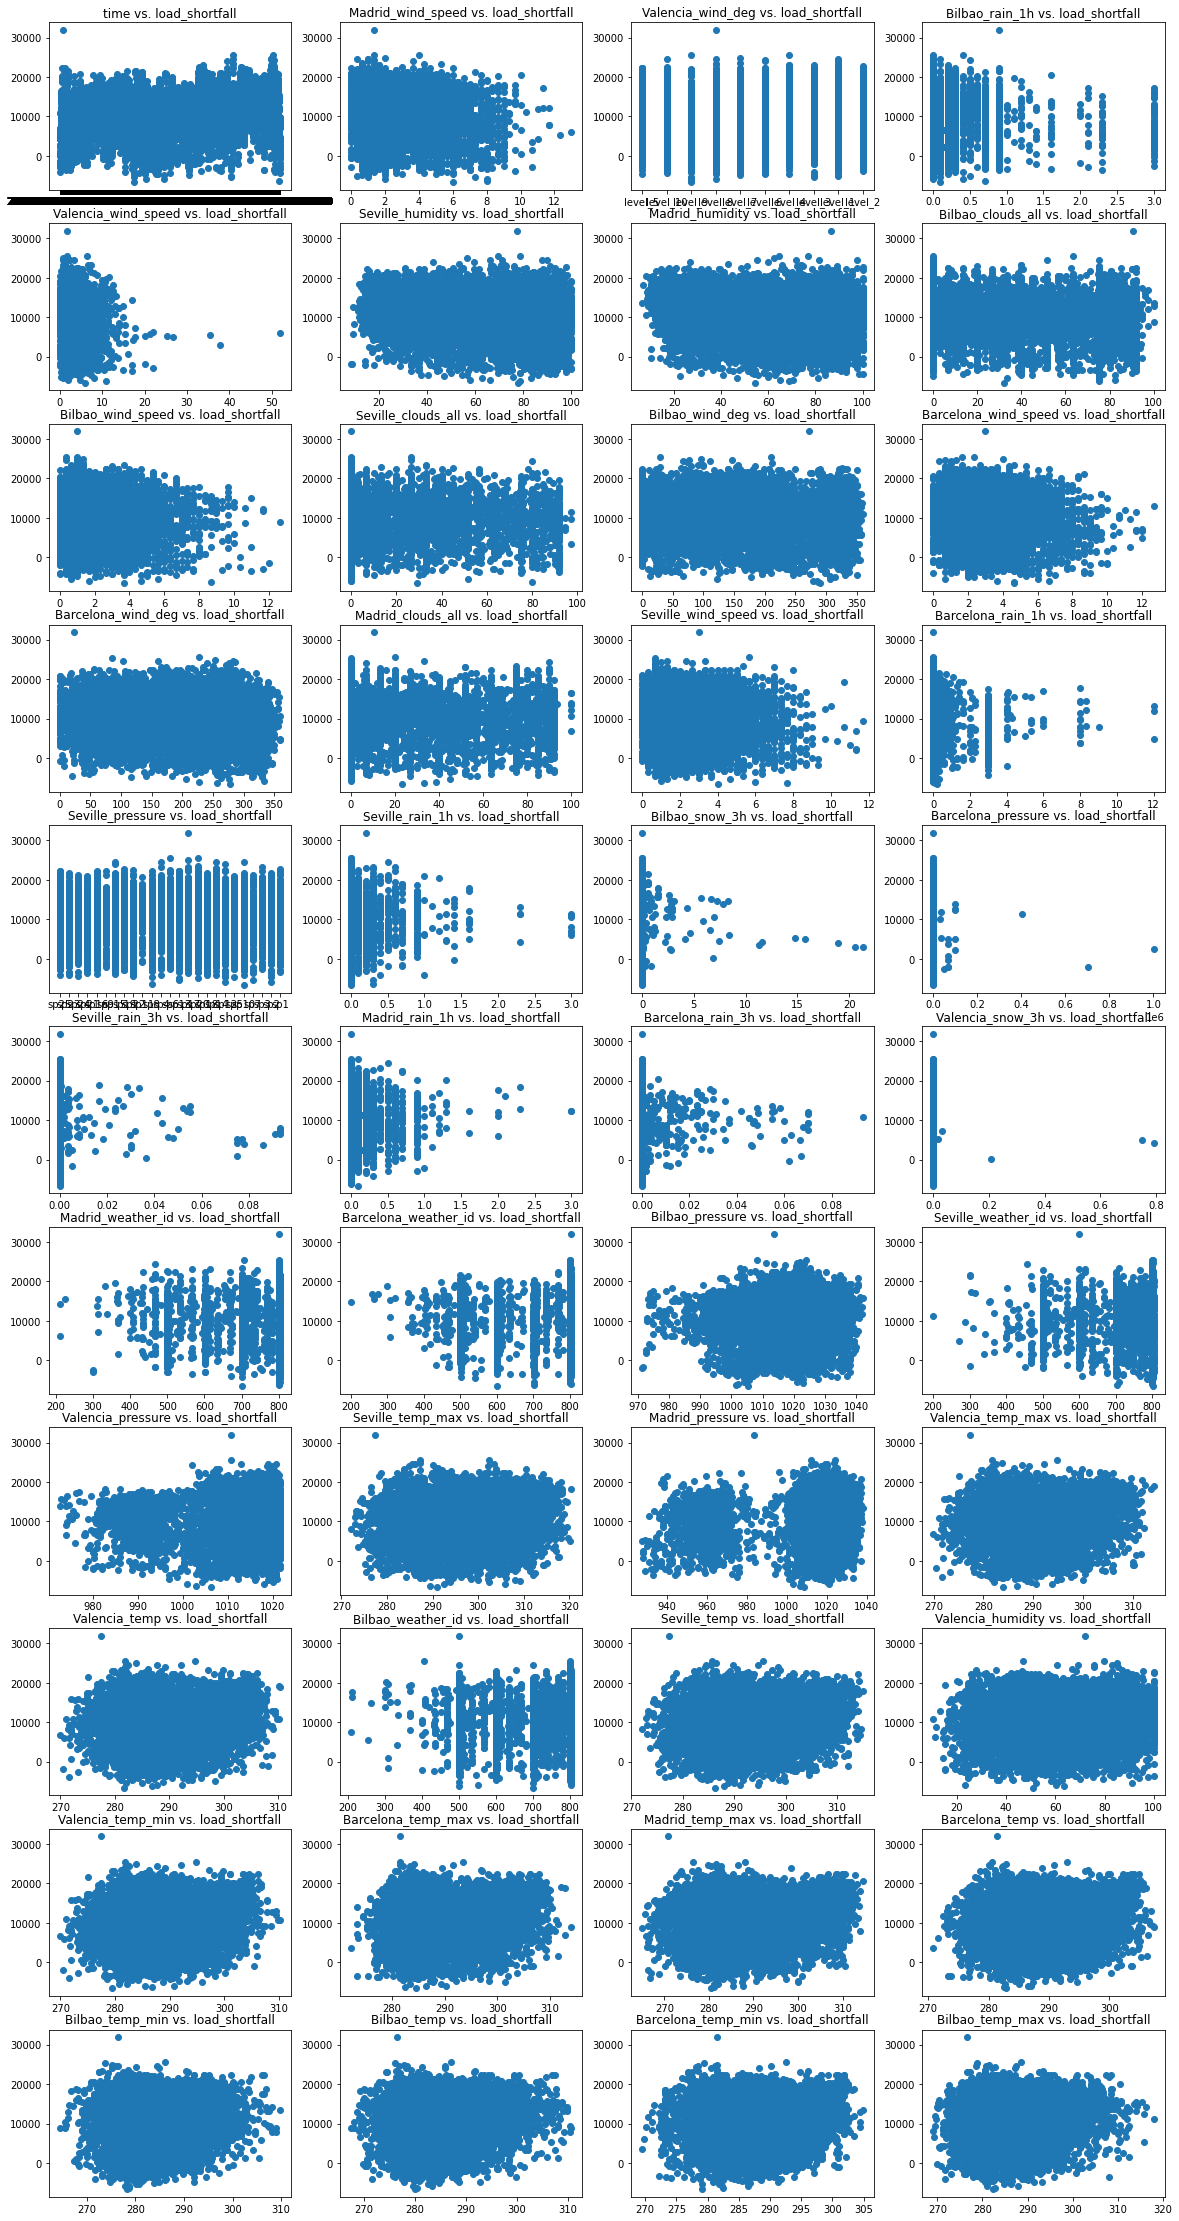

In [4]:
# plot relevant feature interactions
c=df.columns
c=c.drop('load_shortfall_3h')
plt.figure(figsize=(20,40))
for index,col in enumerate(c):
    plt.subplot(11,4,index+1)
    plt.title("{} vs. load_shortfall".format(col))
    plt.scatter(df[col],df['load_shortfall_3h'])

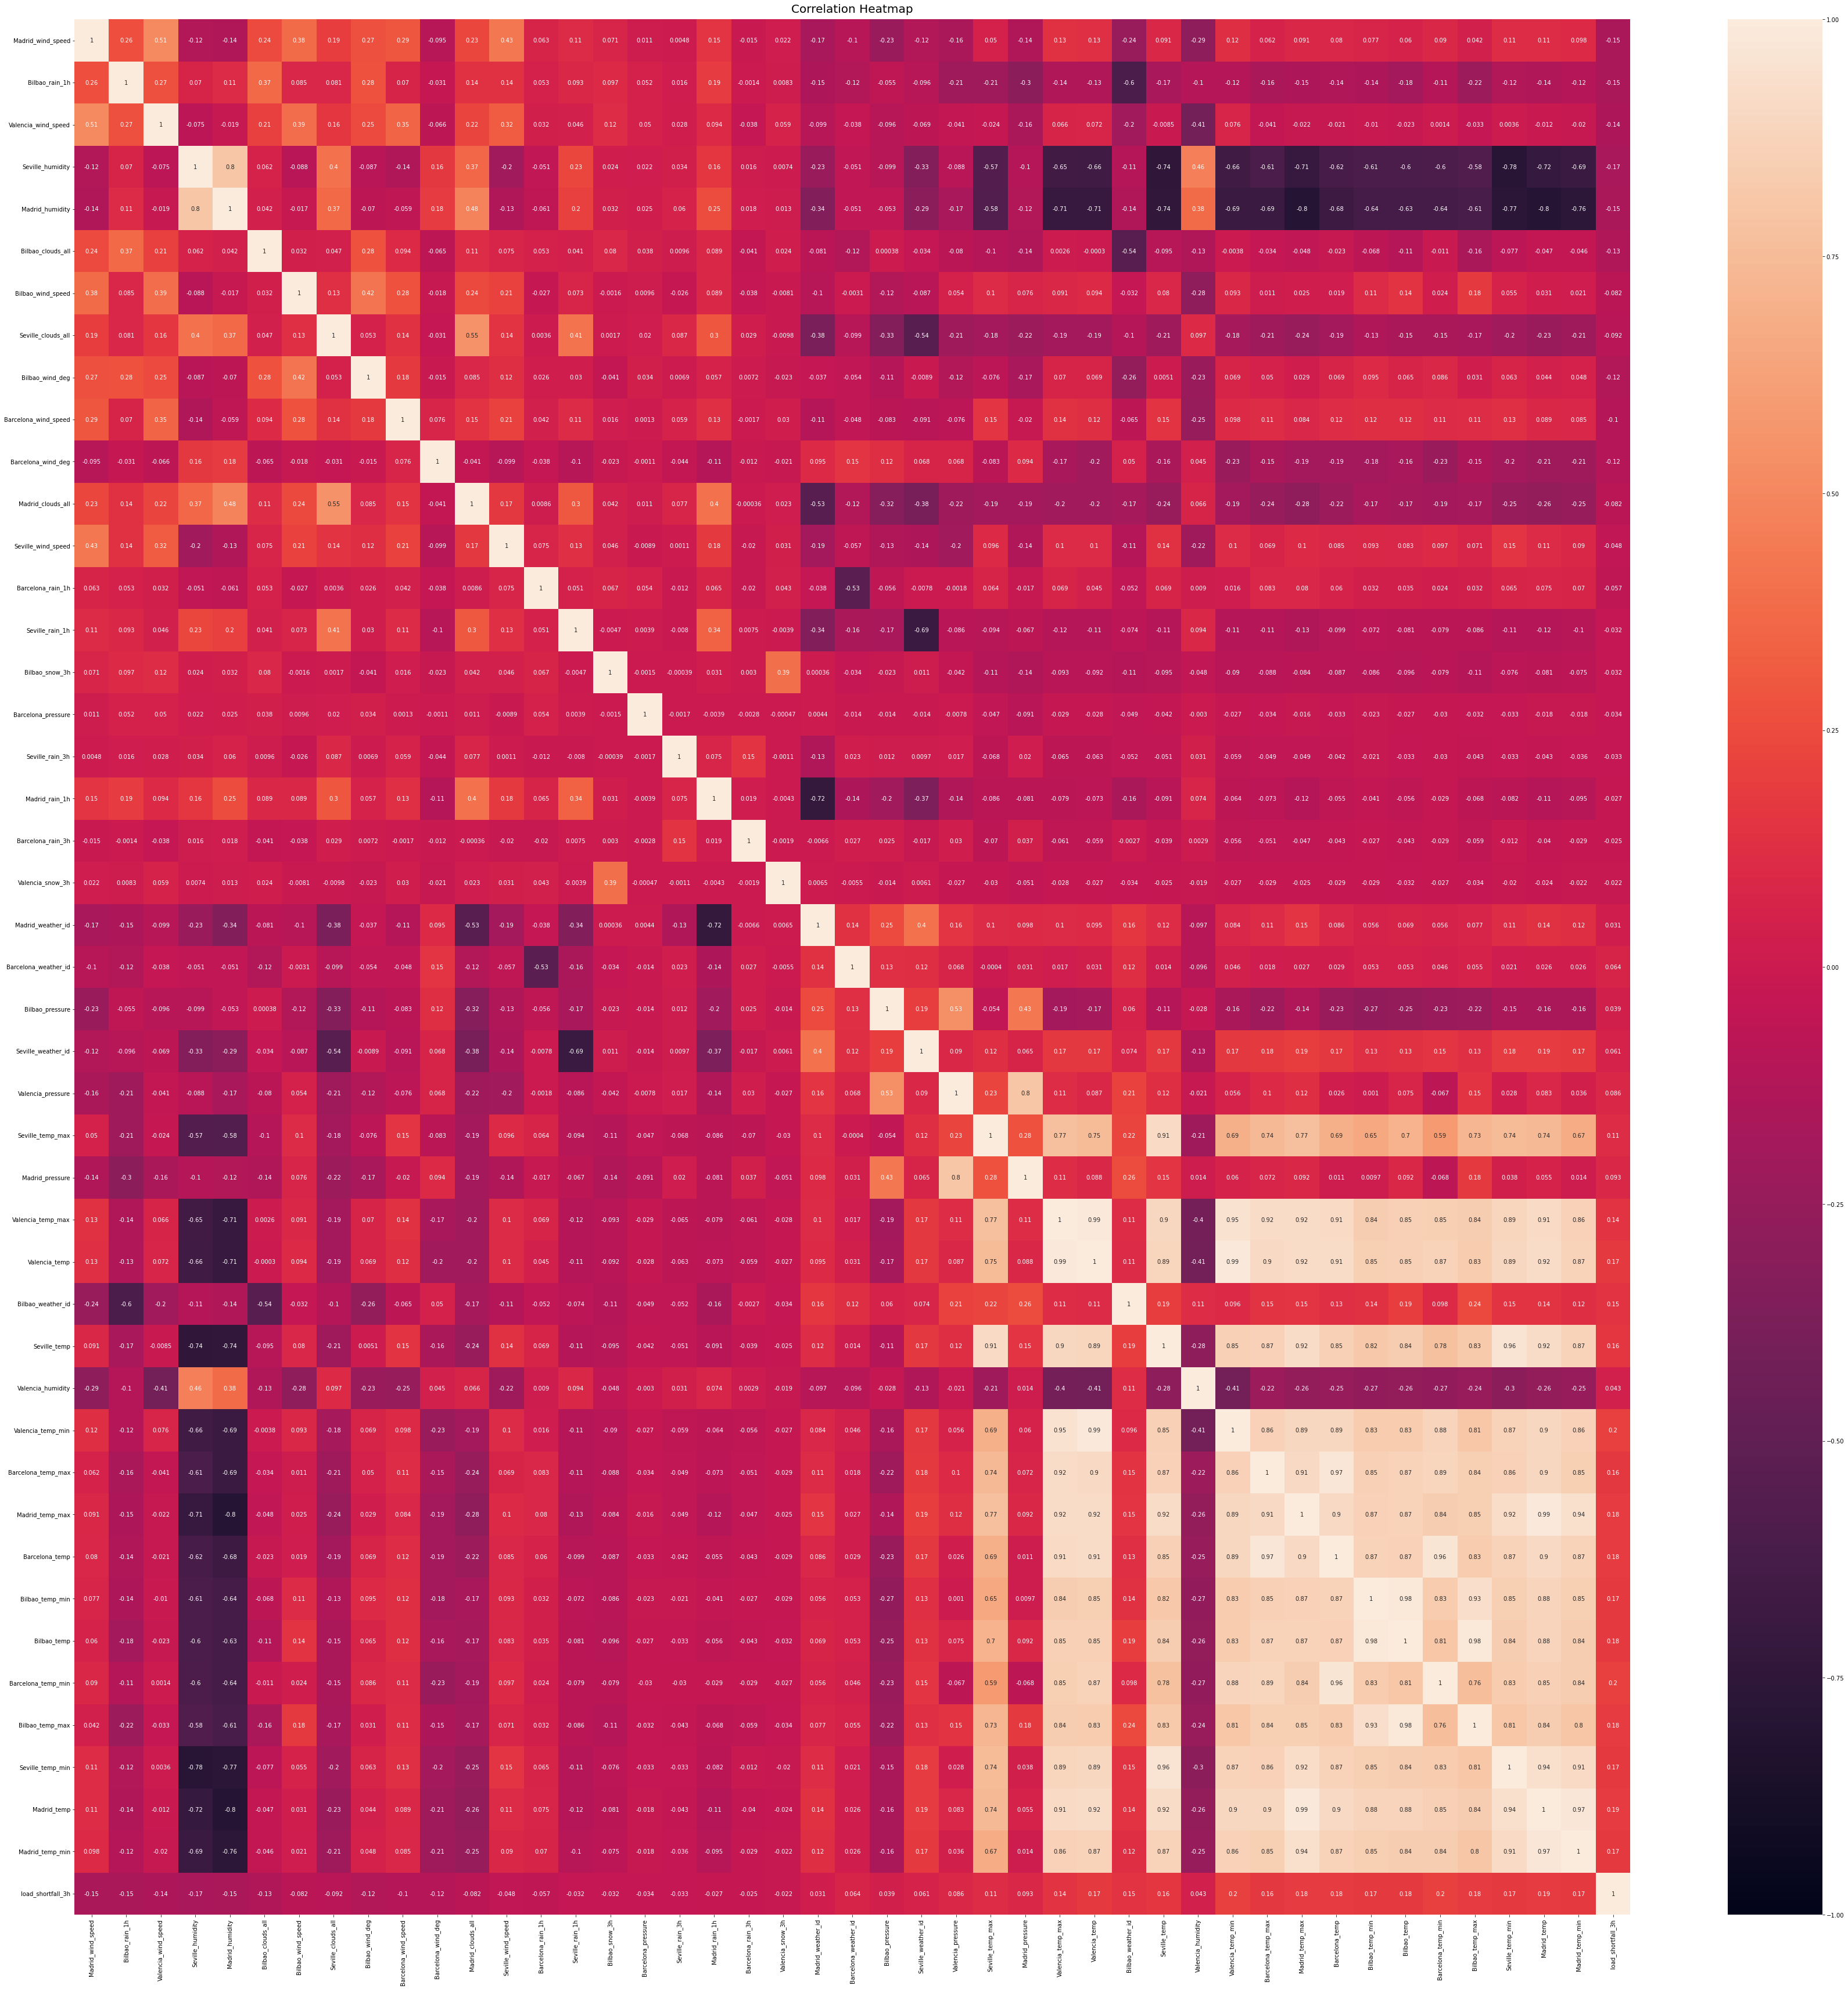

In [5]:
# evaluate correlation
plt.figure(figsize=(60,60))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

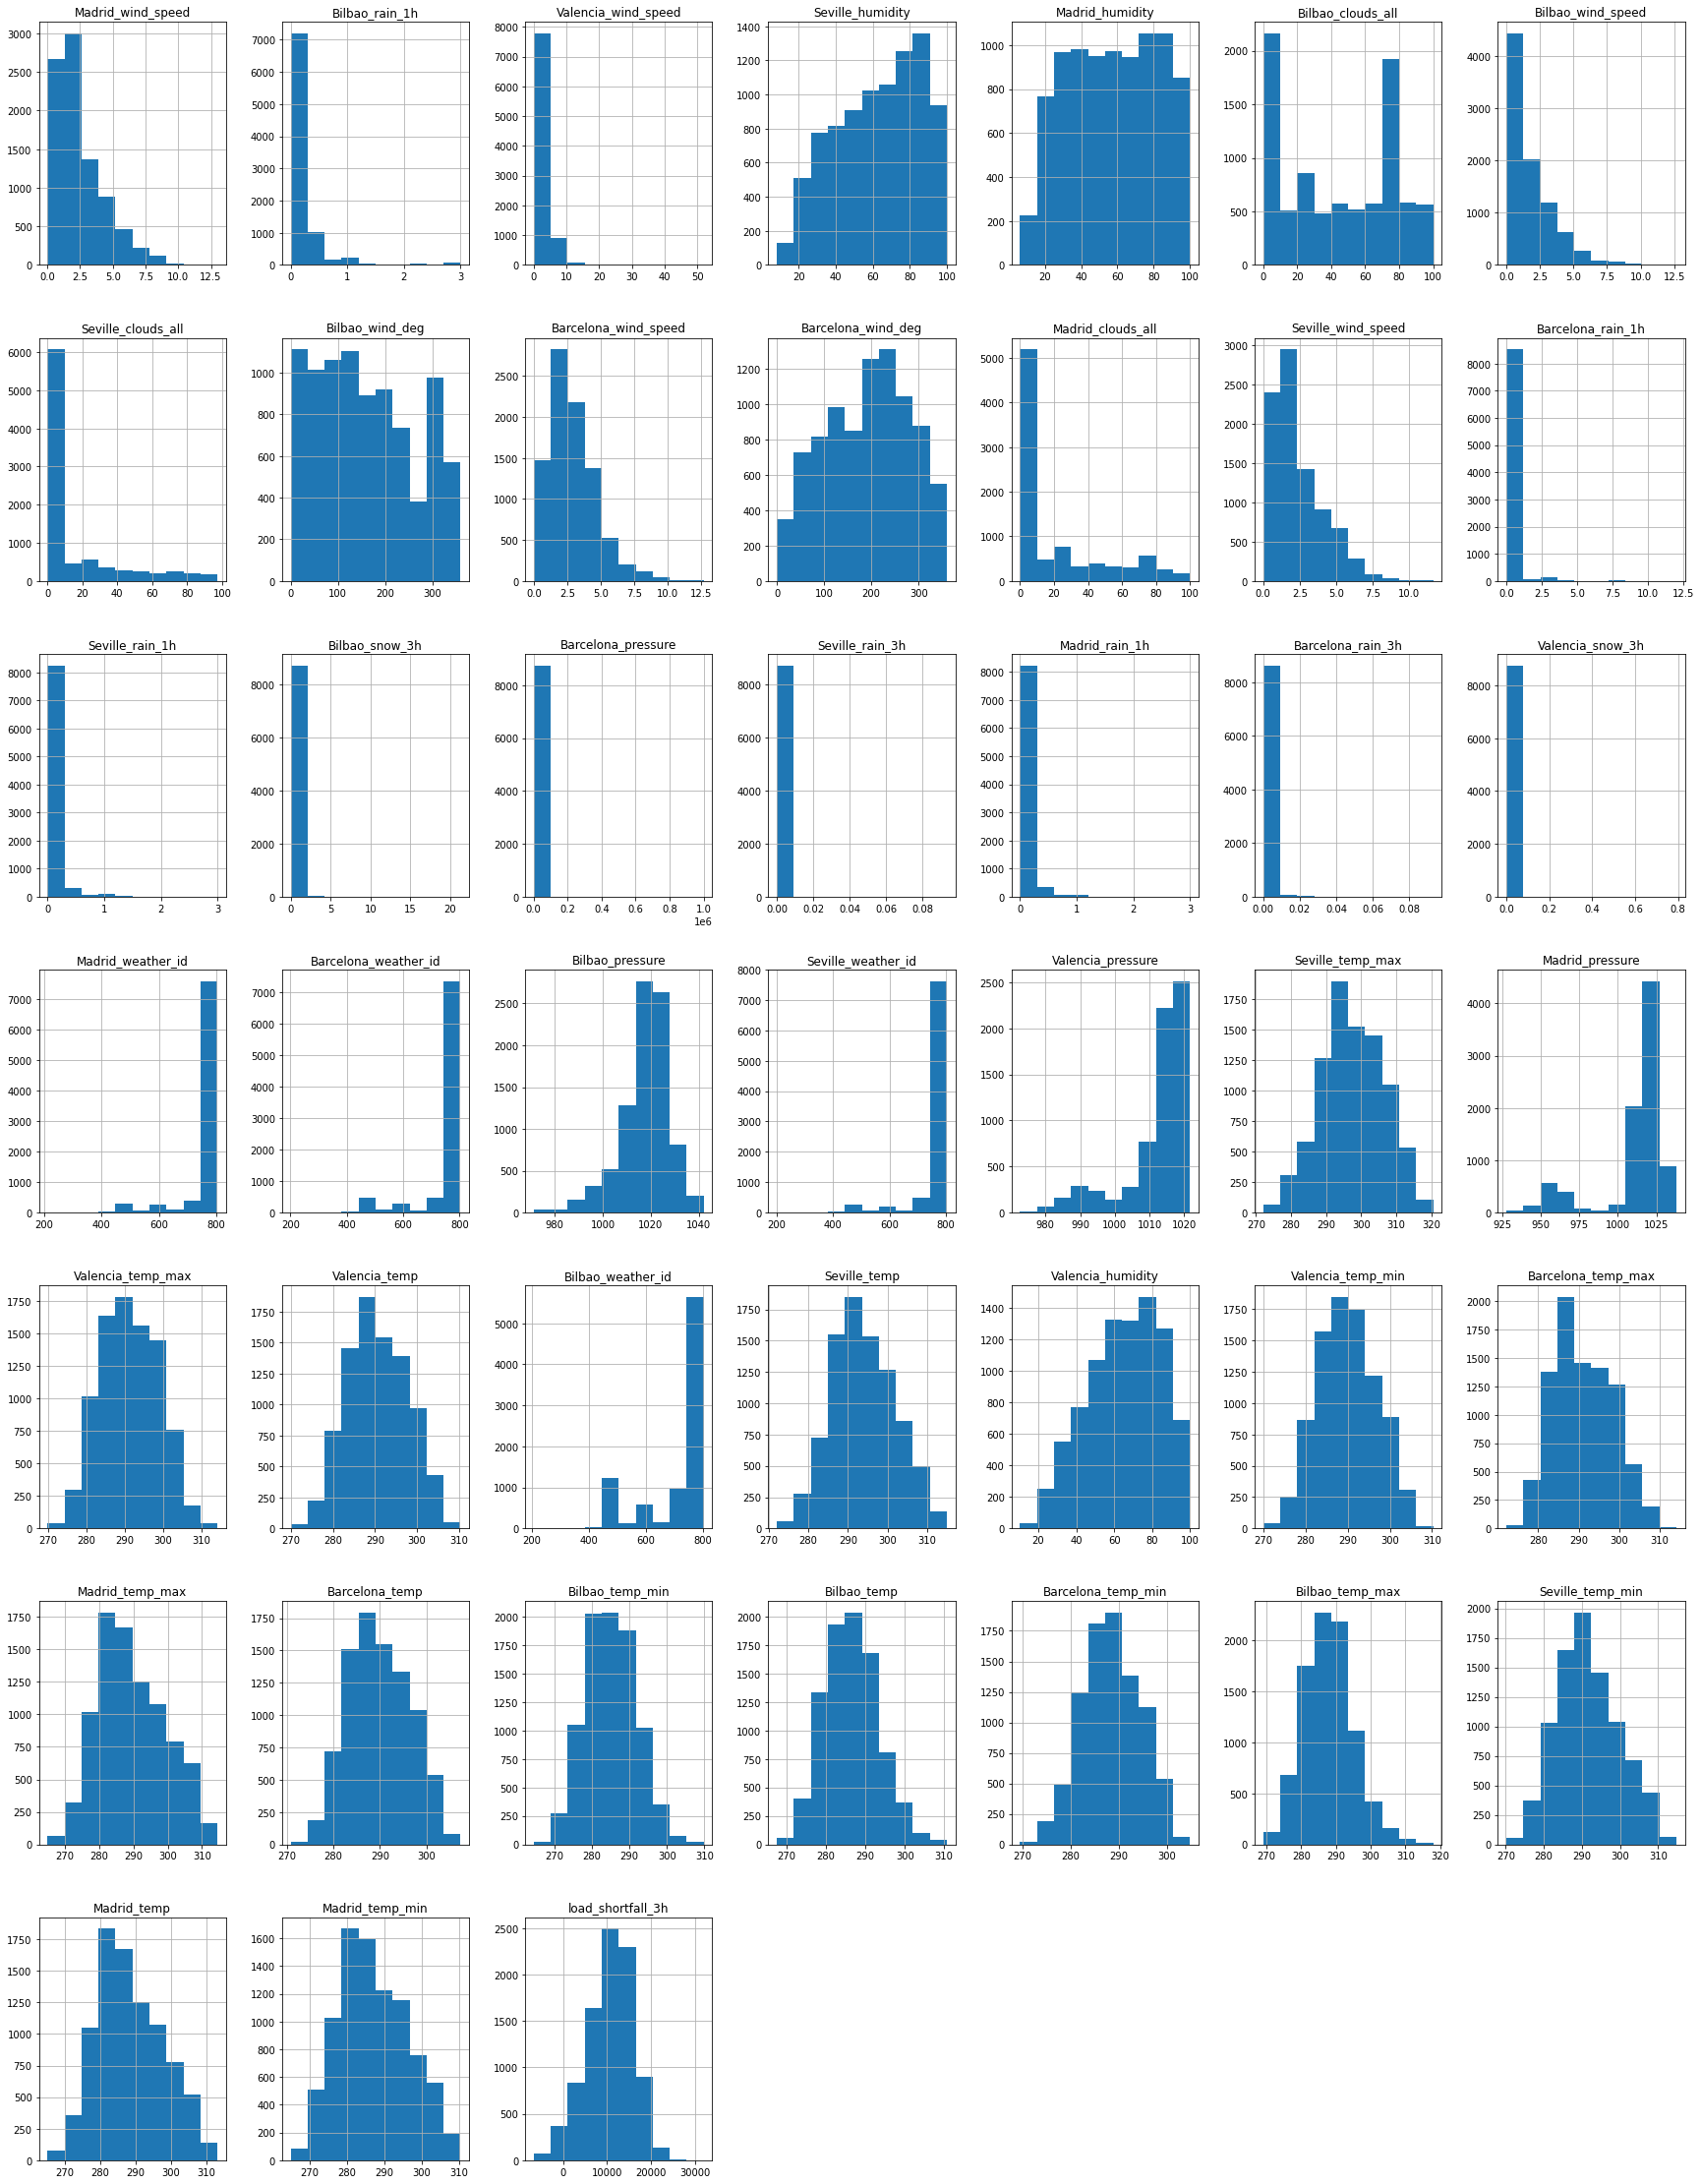

In [12]:
# have a look at feature distributions
features = df.columns # create a list of all numerical features
df[features].hist(figsize=(30,40));


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### 4.1 remove missing values/ features

Check for percentage of nulls in all columns for the train and train data respectively

In [ ]:
#finding columns with null
round((df.isnull().sum()/df.shape[0])*100,2).astype(str)+ '%'

round((df_test.isnull().sum()/df_test.shape[0])*100,2).astype(str)+ '%'

time                      0.0%
Madrid_wind_speed         0.0%
Valencia_wind_deg         0.0%
Bilbao_rain_1h            0.0%
Valencia_wind_speed       0.0%
Seville_humidity          0.0%
Madrid_humidity           0.0%
Bilbao_clouds_all         0.0%
Bilbao_wind_speed         0.0%
Seville_clouds_all        0.0%
Bilbao_wind_deg           0.0%
Barcelona_wind_speed      0.0%
Barcelona_wind_deg        0.0%
Madrid_clouds_all         0.0%
Seville_wind_speed        0.0%
Barcelona_rain_1h         0.0%
Seville_pressure          0.0%
Seville_rain_1h           0.0%
Bilbao_snow_3h            0.0%
Barcelona_pressure        0.0%
Seville_rain_3h           0.0%
Madrid_rain_1h            0.0%
Barcelona_rain_3h         0.0%
Valencia_snow_3h          0.0%
Madrid_weather_id         0.0%
Barcelona_weather_id      0.0%
Bilbao_pressure           0.0%
Seville_weather_id        0.0%
Valencia_pressure       15.55%
Seville_temp_max          0.0%
Madrid_pressure           0.0%
Valencia_temp_max         0.0%
Valencia

Valencia_pressure is the only column with null value entries where the null percentage is 23.6% and 15.55% for train and test data respectively. The percentage is low for us to consider deleting/dropping the column thus replacing the nulls with an appropriate statistic should be explored.

In [ ]:
print('---------Train data stats----->', 'mean:', df.Valencia_pressure.mean(),'median',df.Valencia_pressure.median(), 'mode', df.Valencia_pressure.mode()[0])
print('---------Test data stats----->', 'mean:', df_test.Valencia_pressure.mean(),'median',df_test.Valencia_pressure.median(), 'mode', df_test.Valencia_pressure.mode()[0])

---------Test data stats-----> mean: 1012.0514065222828 median 1015.0 mode 1018.0
---------Test data stats-----> mean: 1013.1483509056495 median 1014.6666666667 mode 1016.0


The mean, median and mode values are approximately the same for both sets of data hence we chose to replace the nulls with mode since this indicate the most common pressure value on the respective dataframe columns.

In [ ]:
# replace null with the mean for test and train data
dfc=df.copy()
dfc['Valencia_pressure'] = dfc['Valencia_pressure'].fillna(df.Valencia_pressure.mode()[0])
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df.Valencia_pressure.mode()[0])


round((dfc.isnull().sum()/dfc.shape[0])*100,2).astype(str)+ '%'

round((df_test.isnull().sum()/df_test.shape[0])*100,2).astype(str)+ '%'


time                    0.0%
Madrid_wind_speed       0.0%
Valencia_wind_deg       0.0%
Bilbao_rain_1h          0.0%
Valencia_wind_speed     0.0%
Seville_humidity        0.0%
Madrid_humidity         0.0%
Bilbao_clouds_all       0.0%
Bilbao_wind_speed       0.0%
Seville_clouds_all      0.0%
Bilbao_wind_deg         0.0%
Barcelona_wind_speed    0.0%
Barcelona_wind_deg      0.0%
Madrid_clouds_all       0.0%
Seville_wind_speed      0.0%
Barcelona_rain_1h       0.0%
Seville_pressure        0.0%
Seville_rain_1h         0.0%
Bilbao_snow_3h          0.0%
Barcelona_pressure      0.0%
Seville_rain_3h         0.0%
Madrid_rain_1h          0.0%
Barcelona_rain_3h       0.0%
Valencia_snow_3h        0.0%
Madrid_weather_id       0.0%
Barcelona_weather_id    0.0%
Bilbao_pressure         0.0%
Seville_weather_id      0.0%
Valencia_pressure       0.0%
Seville_temp_max        0.0%
Madrid_pressure         0.0%
Valencia_temp_max       0.0%
Valencia_temp           0.0%
Bilbao_weather_id       0.0%
Seville_temp  

#### 4.2 create new features

In [ ]:
#check the data type of the features
print(dfc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [ ]:
# check the object variables
print(dfc.Seville_pressure.unique(),dfc.Valencia_wind_deg.unique())

['sp25' 'sp23' 'sp24' 'sp21' 'sp16' 'sp9' 'sp15' 'sp19' 'sp22' 'sp11'
 'sp8' 'sp4' 'sp6' 'sp13' 'sp17' 'sp20' 'sp18' 'sp14' 'sp12' 'sp5' 'sp10'
 'sp7' 'sp3' 'sp2' 'sp1'] ['level_5' 'level_10' 'level_9' 'level_8' 'level_7' 'level_6' 'level_4'
 'level_3' 'level_1' 'level_2']


In [ ]:
#create dummy variables  for the Seville_pressure and also for the Valencia_wind_deg in the train data
dfc['Seville_pressure_category']=dfc.Seville_pressure.map({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19, 'sp22':22, 'sp11':11,
 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20, 'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10,
 'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1})

dfc['Valencia_wind_deg_level']=dfc.Valencia_wind_deg.map({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 'level_7':7, 'level_6':6, 'level_4':4,
 'level_3':3, 'level_1':1, 'level_2':2})
dfc=dfc.drop(['Valencia_wind_deg','Seville_pressure'],axis=1)


In [ ]:
#create dummy variables  for the Seville_pressure and also for the Valencia_wind_deg in the test data

df_test['Seville_pressure_category']=df_test.Seville_pressure.map({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19, 'sp22':22, 'sp11':11,
 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20, 'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10,
 'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1})

df_test['Valencia_wind_deg_level']=df_test.Valencia_wind_deg.map({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 'level_7':7, 'level_6':6, 'level_4':4,
 'level_3':3, 'level_1':1, 'level_2':2})
df_test=df_test.drop(['Valencia_wind_deg','Seville_pressure'],axis=1)


df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       2920 non-null   object 
 1   Madrid_wind_speed          2920 non-null   float64
 2   Bilbao_rain_1h             2920 non-null   float64
 3   Valencia_wind_speed        2920 non-null   float64
 4   Seville_humidity           2920 non-null   float64
 5   Madrid_humidity            2920 non-null   float64
 6   Bilbao_clouds_all          2920 non-null   float64
 7   Bilbao_wind_speed          2920 non-null   float64
 8   Seville_clouds_all         2920 non-null   float64
 9   Bilbao_wind_deg            2920 non-null   float64
 10  Barcelona_wind_speed       2920 non-null   float64
 11  Barcelona_wind_deg         2920 non-null   float64
 12  Madrid_clouds_all          2920 non-null   float64
 13  Seville_wind_speed         2920 non-null   f

In [ ]:
#convert time object column to datetime column
dfc['time']=pd.to_datetime(df['time'])
dfc['year']=pd.DatetimeIndex(dfc.time).year
dfc['month']=pd.DatetimeIndex(dfc.time).month
dfc['day']=pd.DatetimeIndex(dfc.time).day
dfc['hour']=pd.DatetimeIndex(dfc.time).hour

df_test['time']=pd.to_datetime(df_test['time'])
df_test['year']=pd.DatetimeIndex(df_test.time).year
df_test['month']=pd.DatetimeIndex(df_test.time).month
df_test['day']=pd.DatetimeIndex(df_test.time).day
df_test['hour']=pd.DatetimeIndex(df_test.time).hour

#### 4.3 engineer existing features

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler

#create standardized data for train and test data
standardized_train = dfc.drop(['load_shortfall_3h','time'], axis=1)
standardized_test=df_test.drop('time',axis=1)

# create scaler object
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
test_scaled = scaler.fit_transform(standardized_test)
train_scaled = scaler.fit_transform(standardized_train)

# convert the scaled predictor values into a dataframe
standardized_train = pd.DataFrame(train_scaled,columns=standardized_train.columns)
standardized_test = pd.DataFrame(test_scaled,columns=standardized_test.columns)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### 5.1 Split data

In [ ]:
# split data and set test size to 20 % of training data
X = dfc.drop(['load_shortfall_3h','time'], axis=1)
y = dfc['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(standardized_train,y,test_size=0.20,random_state=1)

#split data for regression tree model
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(standardized_train,y,test_size=0.2,random_state=42)

# Train test split for random forest 
x_train_random_forest, x_test_random_forest, y_train_random_forest,y_test_random_forest = train_test_split(standardized_train,y,test_size=0.2,random_state=6)

In [ ]:
# create targets and features dataset


### 5.2 model creation

In [ ]:
# create one or more ML models
lm = LinearRegression()

#create the ridge model
ridge = Ridge()

#create the lasso model
lasso = Lasso(alpha=0.01)

# Instantiate regression tree model with max depth of 2
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)


# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)

### 5.3 model training

In [ ]:
#train the linear regression model
lm.fit(X_train, y_train)

#train the ridge model
ridge.fit(X_train, y_train)

#train the lasso model
lasso.fit(X_train, y_train)

#train the regression tree model
regr_tree.fit(x_train_tree,y_train_tree)

#train the random forest
RF.fit(x_train_random_forest,y_train_random_forest)

C:\Users\Install\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77925328002.84045, tolerance: 19172900.923819404
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor(max_depth=5)

### 5.4 make predictions

In [ ]:
### predict for seen and unseen data using linear regression model
y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

#predict for seen and unseen data using ridge model
y_pred_test_ridge=ridge.predict(X_test)
y_pred_train_ridge=ridge.predict(X_train)

#predict for seen and unseen data using lasso model
y_pred_test_lasso = lasso.predict(X_test)
y_pred_train_lasso = lasso.predict(X_train)

# get predictions for test data using decision tree
y_pred_test_tree = regr_tree.predict(x_test_tree)
y_pred_train_tree = regr_tree.predict(x_train_tree)

# Get predictions using random forest
y_pred_test_random_forest = RF.predict(x_test_random_forest)
y_pred_train_random_forest = RF.predict(x_train_random_forest)

### 5.5 evaluate one or more ML models

In [ ]:
#RMSE for linear regreession model in unseen data
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#RMSE for ridge model in unseen data
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))

#RSME for lasso model in unseen data
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso)))

#RSME for decision tree model model in unseen data
print(np.sqrt(metrics.mean_squared_error(y_test_tree,y_pred_tree)))

#RSME for random forest model model in unseen data
print(np.sqrt(metrics.mean_squared_error(y_test_random_forest,y_pred_random_forest)))

NameError: name 'y_pred' is not defined

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### 6.1 Compare model performance

In [ ]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Linear regression": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_ridge)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lasso)),
                        "Decision tree": np.sqrt(metrics.mean_squared_error(y_train_tree, y_pred_train_tree)),
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_train_random_forest, y_pred_train_random_forest))
                    },
                    'Test MSE':
                    {
                        "Linear regression": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso)),
                        "Decision tree": np.sqrt(metrics.mean_squared_error(y_test_tree, y_pred_test_tree)),
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_test_random_forest,y_pred_test_random_forest))
                    }
                }

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

# View the results
results_df

,Training MSE,Test MSE
Linear regression,4739.599959,4689.410635
Ridge,4739.888400,4688.790921
LASSO,4740.133435,4689.559988
Decision tree,4792.020584,4896.374178
Random Forest,3896.993388,4016.297512


In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

# 8. make submission on kaggle

In [ ]:
#predict for linear model
y_pred_lasso=lm.predict(standardized_test)
daf=pd.DataFrame(y_pred_lasso, columns=['load_shortfall_3h'])

#convert to csv
df_test['load_shortfall_3h']=daf.values
sub=df_test[['time','load_shortfall_3h']]
sub.to_csv("linear_model_team_16.csv", index=False)

#predict for ridge
y_pred_lasso=ridge.predict(standardized_test)
daf=pd.DataFrame(y_pred_lasso, columns=['load_shortfall_3h'])

#convert ridge predictions to csv
df_test['load_shortfall_3h']=daf.values
sub=df_test[['time','load_shortfall_3h']]
sub.to_csv("Ridge_team_16.csv", index=False)


#predict for lasso
y_pred_lasso=lasso.predict(standardized_test)
daf=pd.DataFrame(y_pred_lasso, columns=['load_shortfall_3h'])
#convert lasso predictions to csv
df_test['load_shortfall_3h']=daf.values
sub=df_test[['time','load_shortfall_3h']]
sub.to_csv("lasso_team_16.csv", index=False)



#predict for decision tree
y_pred_lasso=regr_tree.predict(standardized_test)
daf=pd.DataFrame(y_pred_lasso, columns=['load_shortfall_3h'])

#convert decision tree predictions to csv
df_test['load_shortfall_3h']=daf.values
sub=df_test[['time','load_shortfall_3h']]
sub.to_csv("decision_tree_team_16.csv", index=False)


#predict for random forest
y_pred_lasso=RF.predict(standardized_test)
daf=pd.DataFrame(y_pred_lasso, columns=['load_shortfall_3h'])

#convert random forest predictions to csv
df_test['load_shortfall_3h']=daf.values
sub=df_test[['time','load_shortfall_3h']]
sub.to_csv("Random_forest_team_16.csv", index=False)